## Observations and Insights 


* The comparative study of Capomulin treatment for squamous cell carcinoma (SCC) involves eight other drugs and a placebo regimen. Each were conducted to an average population of 189 mice. The sample size was not normally distributed. Capomulin drug had the maximum sample size of 230, while Propriva had the smallest sample of 161. 

    A total number of 249 mice were tested but this analysis considers only 248, after Mouse ID g989 was dropped due to duplicate time points in the dataset.
    
    Gender distribution consists of nearly equal number of female and male mice. 
    
    The Mouse Weight and Average Tumor Volume indicators of Capomulin drug had a strong positive correlation with a Pearson's R Value of 0.84, demonstrated by a firm or straight-line of regression. 
    
    A randomly selected mouse ID s185, manifested decreasing tumor volume levels as the time point increases while on Capomulin regimen. 
-----


In [ ]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and display preview
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [4]:
# Read study results and display preview
study_results = pd.read_csv(study_results_path)
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [5]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data for preview
combine_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [6]:
# Checking the number of mice in the DataFrame
total_mice = len(combine_data['Mouse ID'].unique())
print(f"The total mice count is: {total_mice}")

The total mice count is: 249


In [7]:
# Before beginning the analysis, check for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mouse = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"Mouse ID: {duplicate_mouse} has duplicate time points")

Mouse ID: ['g989'] has duplicate time points


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = combine_data.loc[combine_data['Mouse ID'] =='g989', :]
g989_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combine_data.loc[combine_data['Mouse ID'] != 'g989', :]
clean_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [9]:
# Checking the number of mice after cleaning the data
total_mice2 = len(clean_data['Mouse ID'].unique())            
print(f"The total number of mice is now: {total_mice2} after the data was cleaned" )

The total number of mice is now: 248 after the data was cleaned


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Population = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].count()
mean = combine_data.groupby("Drug Regimen") ['Tumor Volume (mm3)'].mean()
median = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
variance = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
stdv = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
sem = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Population': Population, 'Mean': mean, 'Median': median, 'Variane': variance,
                                   'Standard Deviation': stdv, 'SEM': sem})
summary_statistics

,Population,Mean,Median,Variane,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
sample_size = summary_statistics['Population'].mean()
print(f"The average sample size accross all treament regimen is: {sample_size}")

The average sample size accross all treament regimen is: 189.3


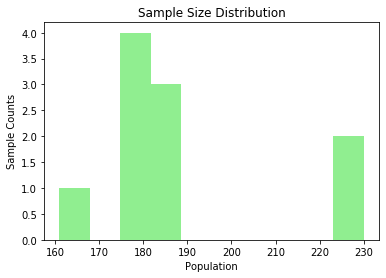

The sample size was not normally distributed


In [34]:
plt.hist(summary_statistics['Population'], color='lightgreen')
plt.title("Sample Size Distribution")
plt.xlabel("Population")
plt.ylabel("Sample Counts")
plt.show()
print(f"The sample size was not normally distributed")

## Bar and Pie Charts

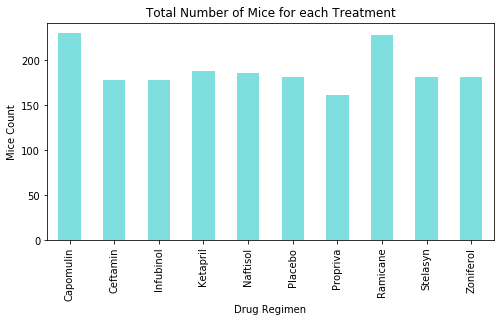

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated = summary_statistics[['Population']]
mice_treated = mice_treated.rename(columns = {'Population': 'Total Number of Mice'})
mice_treated.plot(kind='bar', figsize=(8,4), color = 'c', alpha=0.5, align='center', legend=False) #No legend as it will redundant
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()

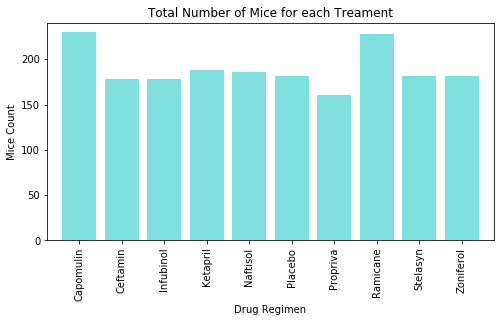

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_treated))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_treated['Total Number of Mice'], color = 'c', alpha=0.5, align='center') #No legend as it will redundant
plt.xticks(tick_locations, mice_treated.index.values, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_treated['Total Number of Mice'])+10)
plt.title("Total Number of Mice for each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

In [16]:
# Calculate gender distribution from the cleaned data
female_group = clean_data.groupby(['Sex']).get_group(('Female'))
female_count = len(female_group['Mouse ID'].unique())
male_group = clean_data.groupby(['Sex']).get_group(('Male'))
male_count = len(male_group['Mouse ID'].unique())
# Display values
gender = {'Gender':[female_count, male_count]}
gender_df = pd.DataFrame(gender, index=['Female', 'Male'])
gender_df

,Gender
Female,123
Male,125


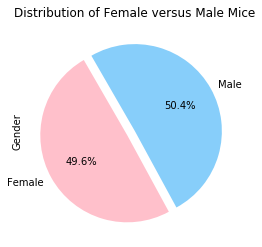

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
gender_df.plot(kind='pie', labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
               subplots=True, legend=False, explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()

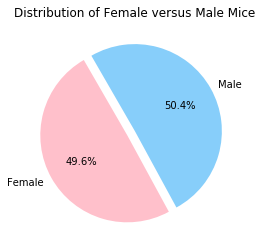

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.pie(gender_df['Gender'], labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
        explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = clean_data.loc[(clean_data['Drug Regimen'] =='Capomulin') | 
                             (clean_data['Drug Regimen'] =='Ramicane') |
                            (clean_data['Drug Regimen'] == 'Infubinol') |
                            (clean_data['Drug Regimen'] == 'Ceftamin'), :]

# Sort drug list by showing first the last(greatest) timepoint
drug_list = drug_list.sort_values(['Drug Regimen', 'Mouse ID','Timepoint'], ascending =False)
# Keep the last (greatest) timepoint & drop the other values
sortlast_timepoint = drug_list.drop_duplicates(subset='Mouse ID', keep='first')
# Finalize the drug list variables with Timepoint and its corresponding Tumor Volume 
druglist_indicators = sortlast_timepoint[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
final_druglist.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
84,Ramicane,z578,45,30.638696
453,Ramicane,y449,15,44.183451
449,Ramicane,w678,5,43.166373
410,Ramicane,u196,45,40.667713
59,Ramicane,s508,45,30.276232


In [57]:
df.setfinal_druglist.set_index('Drug Regimen', inplace=True)
final_druglist.head()

KeyError: "None of ['Drug Regimen'] are in the columns"

In [56]:
reformat_list = final_druglist.set_index('Drug Regimen', inplace=True)
reformat_list

KeyError: "None of ['Drug Regimen'] are in the columns"

In [54]:
reformat_list = {'Timepoint': []'Drug Regimen'], ['Mouse ID']], 
                               columns=['Timepoint', 'Tumor Volume (mm3)'])
pd.MultiIndex.from_frame(reformat_list)
reformat_list.head()

AttributeError: module 'pandas' has no attribute 'final_druglist'

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [38]:
#pd.set_option('display.max_rows', drug_list2.shape[0]+1)
drug_list2 = drug_list.sort_values(['Drug Regimen', 'Mouse ID','Timepoint'], ascending =False)
drug_list2 = drug_list.drop_duplicates(subset='Mouse ID', keep='first')
#print(drug_list2)
drug_list2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
84,z578,Ramicane,Male,11,16,45,30.638696,0
453,y449,Ramicane,Male,19,24,15,44.183451,0
449,w678,Ramicane,Female,5,24,5,43.166373,0
410,u196,Ramicane,Male,18,25,45,40.667713,3
59,s508,Ramicane,Male,1,17,45,30.276232,0
...,...,...,...,...,...,...,...,...
360,g316,Capomulin,Female,22,22,45,40.159220,2
244,g288,Capomulin,Male,3,19,45,37.074024,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
299,b742,Capomulin,Male,7,21,45,38.939633,0


In [40]:
drug_list3 = drug_list2[['Drug Regimen', 'Mouse ID', 'Timepoint']]
drug_list3.head()

,Drug Regimen,Mouse ID,Timepoint
84,Ramicane,z578,45
453,Ramicane,y449,15
449,Ramicane,w678,5
410,Ramicane,u196,45
59,Ramicane,s508,45


In [ ]:
refilter = drug_list.pivot(index='Drug Regimen', 'Mouse ID', columns='Timepoint')

In [256]:
counter = 0

for drug in drug_list2:
    # Determine quartiles
    quartiles = drug_list2['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if counter == 0:
        print(lowerq)

37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new DataFrame for Capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data.head(1)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.0,0


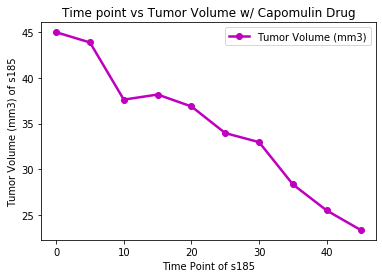

<Figure size 432x288 with 0 Axes>

In [22]:
# Select a mouse that was treated with Capomulin 
s185_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == "s185"]

# Associate with timepoint versus tumor volume
s185_mouse = s185_mouse.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
s185_mouse= s185_mouse.reset_index(drop=True)

# Display line plot
s185_mouse.set_index('Timepoint').plot(kind='line', figsize=(6,4), linewidth=2.5, color='m', marker='o', legend=True)
plt.title("Time point vs Tumor Volume w/ Capomulin Drug")
plt.xlabel("Time Point of s185")
plt.ylabel("Tumor Volume (mm3) of s185")
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

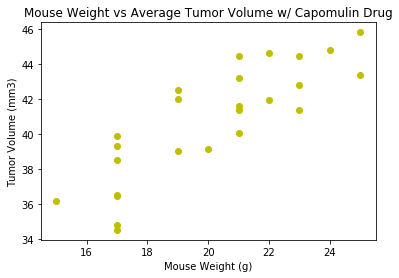

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

# Set x & y values
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].unique()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Display scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, color='y')
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Drug")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].mean()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

correlation = round(st.pearsonr(mouse_weight, avg_tumor_volume)[0],2)
print(f"The correlation between mouse weight and the average tumor volume variables is {correlation}")

The correlation between mouse weight and the average tumor volume variables is 0.84


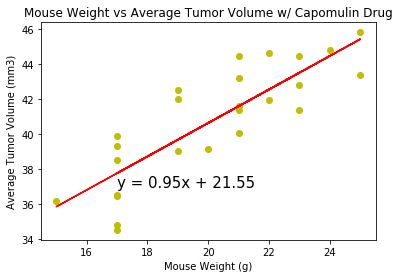

The regression line equation is: y = 0.95x + 21.55
It shows a straight line, indicating a positive strong correlation


In [27]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

regress_value = slope * mouse_weight + intercept
regress_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
# Display scatter plot with the linear model
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values, color='y')
plt.plot(x_values, regress_value, 'r-')
plt.annotate(regress_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Drug")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The regression line equation is: {regress_eq}")
print(f"It shows a straight line, indicating a positive strong correlation")